## Appendix Figure A1: Percent of Forbes 400 members with top 30 private BAs, MBAs, and JDs

### From Elite Embeddedness

By Charlie Eaton and Albina Gibadullina

In [1]:
use data/d_forbes400_alum_board_1989_2003_2017, clear
gen nonfin=(pehedge!=1 & otherfin!=1 & technology!=1)
gen all=1

In [2]:
local pehedge "private equity & hedge"
local otherfin "other finance"
local technology "technology"
local nonfin "other"
quietly foreach var in pehedge otherfin nonfin technology all {
gen top30bapriv`var'=(collegeschooltype==3)*100 if `var'==1
    label var top30bapriv`var' "``var''"
gen top30bapub`var'=(collegeschooltype==2)*100 if `var'==1
    label var top30bapub`var' "``var''"
gen top30mbapriv`var'=(mbaschooltype==3)*100 if `var'==1
    label var top30mbapriv`var' "``var''"
gen top30mbapub`var'=(mbaschooltype==2)*100 if `var'==1
    label var top30mbapub`var' "``var''"
gen top30jdpriv`var'=(jdschooltype==3)*100 if `var'==1
    label var top30jdpriv`var' "``var''"
gen top30jdpub`var'=(jdschooltype==2)*100 if `var'==1
    label var top30jdpub`var' "``var''"
}

In [3]:
sum top30baprivall top30bapuball top30mbaprivall top30mbapuball


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
top30bapri~l |      1,200    30.83333    46.19976          0        100
top30bapub~l |      1,200       14.25     34.9708          0        100
top30mbapr~l |      1,200    12.41667    32.99091          0        100
top30mbapu~l |      1,200    .6666667    8.141097          0        100


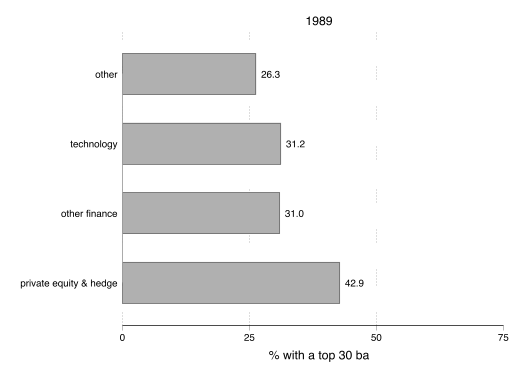

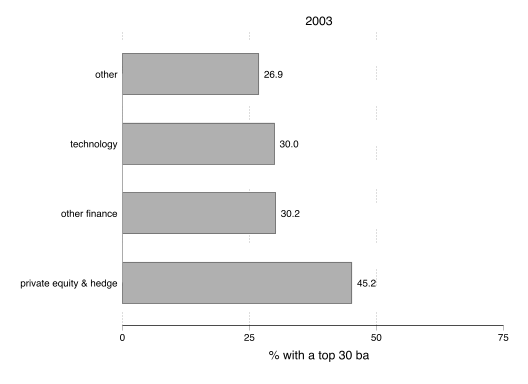

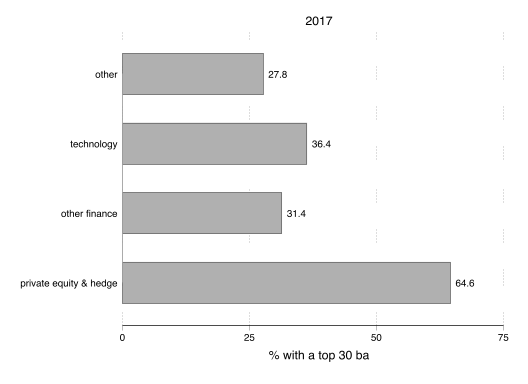

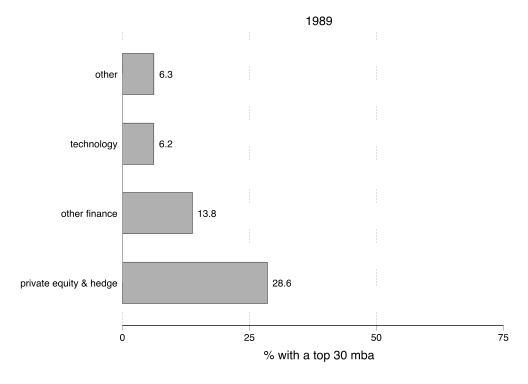

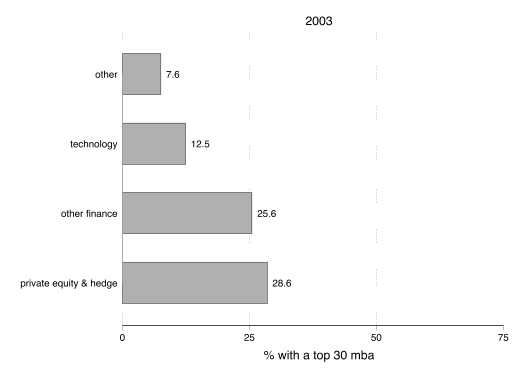

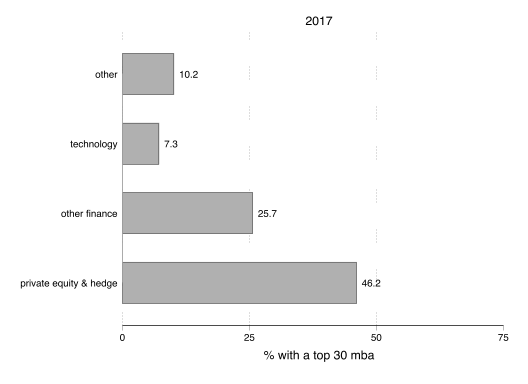

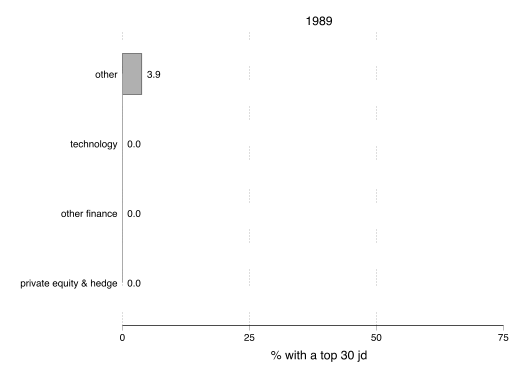

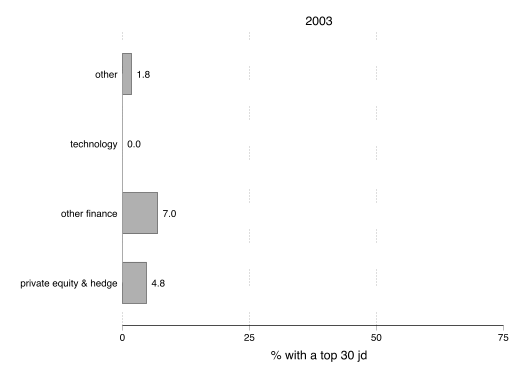

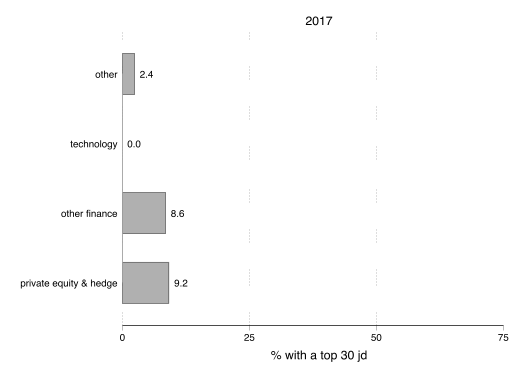

In [4]:
foreach control in priv {
foreach degree in ba mba jd {
foreach year in 1989 2003 2017 {
statplot top30`degree'`control'nonfin top30`degree'`control'tech ///
top30`degree'`control'otherfin top30`degree'`control'pehedge ///
if year==`year', name(top30`degree'`control'`year', replace) blabel(bar, format(%9.1f)) ///
ytitle("% with a top 30 `degree'") title(`year') ylabel(0(25)75) scheme(plotplain)
}
}
}

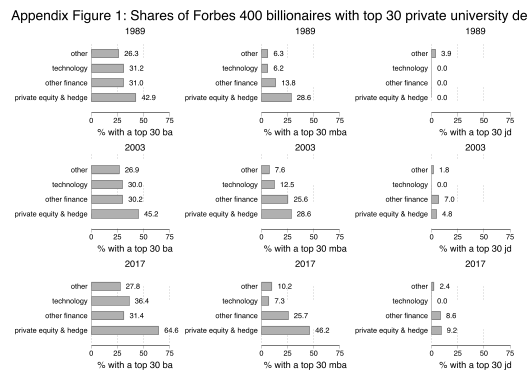

In [5]:
graph combine top30bapriv1989 top30mbapriv1989 top30jdpriv1989 ///
top30bapriv2003 top30mbapriv2003 top30jdpriv2003 ///
top30bapriv2017 top30mbapriv2017 top30jdpriv2017 ///
, xsize(16) ysize(12) scheme(plotplain) imargins(zero) name(Forbes400privatedegrees, replace) ///
title("Appendix Figure 1: Shares of Forbes 400 billionaires with top 30 private university degrees", ///
span justification(left)) 

In [6]:
graph export figures/fa1_forbes400_private_ba_mba_jd.pdf, replace

file figures/fa1_forbes400_private_ba_mba_jd.pdf saved as PDF format
